In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df_peng = pd.read_csv('penguins_size.csv')

In [2]:
df_peng

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
#check for null values in the dataset
df_peng.isnull().sum().sum()

18

In [4]:
df_peng = df_peng.dropna() #drop all the null values

In [5]:
df_peng.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
gender               0
dtype: int64

In [6]:
df_peng.isnull().sum().sum()

0

In [7]:
df_peng = df_peng[df_peng["gender"] != '.']
df_peng['gender'].unique()

array(['MALE', 'FEMALE'], dtype=object)

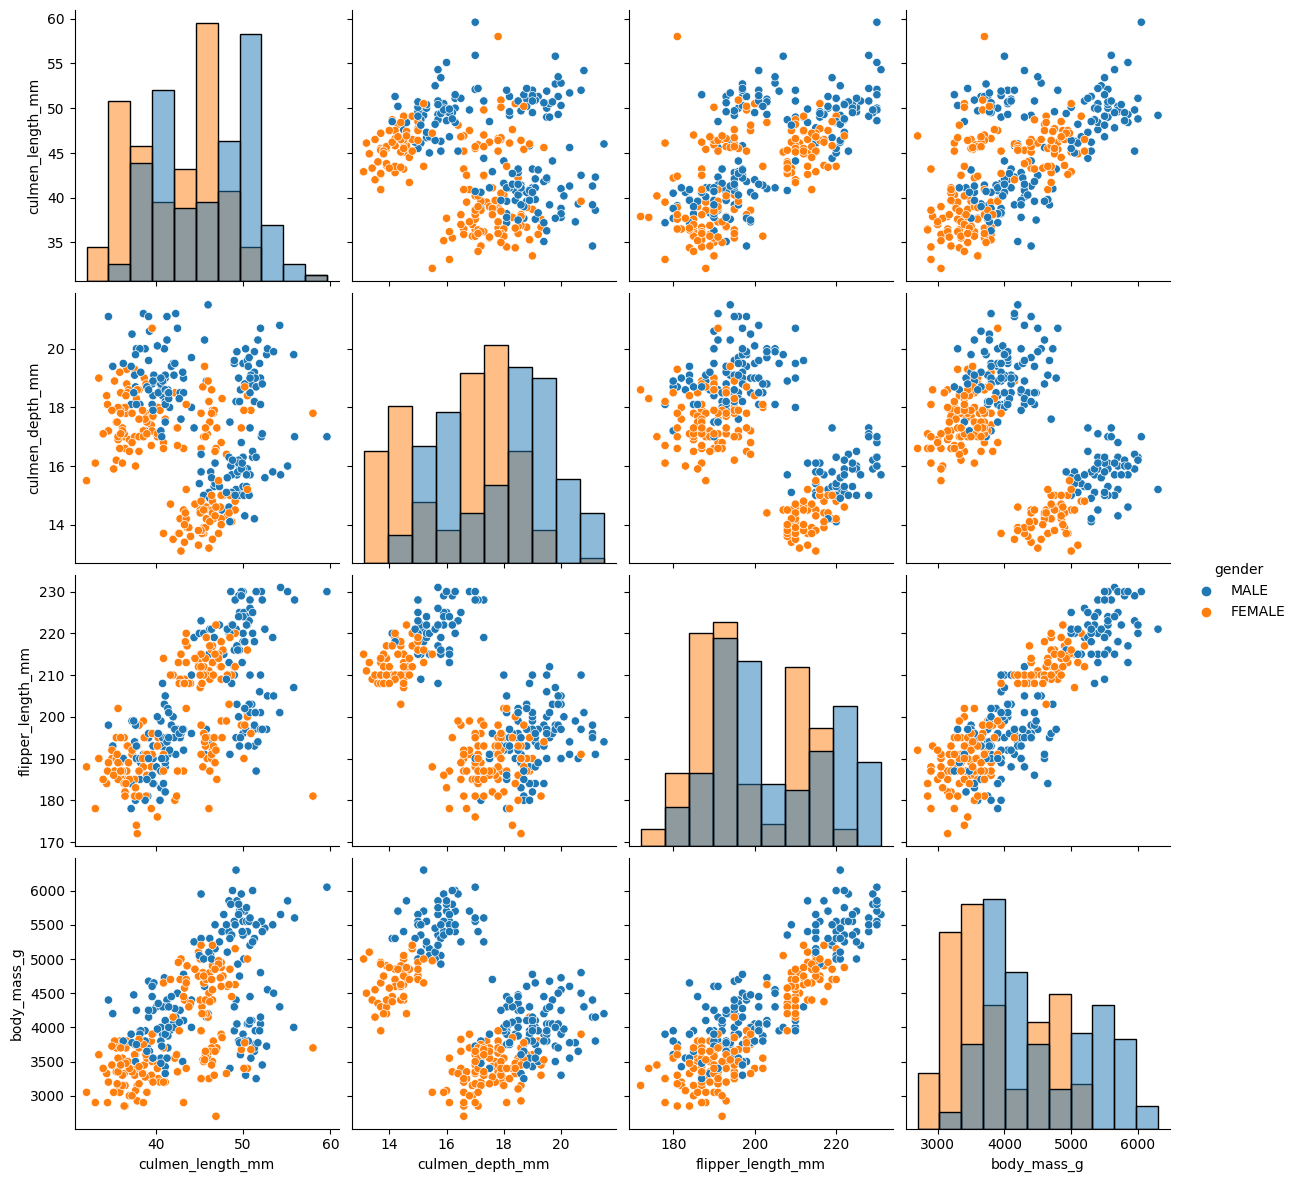

In [8]:
sns.pairplot(df_peng, hue="gender", height=3, diag_kind="hist")

In [9]:
df_peng['gender'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [10]:
print('\n',df_peng.info())
print(df_peng.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   gender             333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB

 None
(333, 7)


<AxesSubplot:xlabel='gender', ylabel='count'>

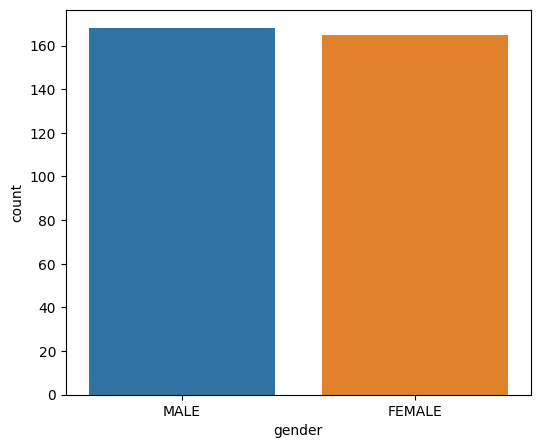

In [11]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
sns.countplot(x=df_peng["gender"], ax=ax)

In [12]:
#seperate the features and the target
X = df_peng.drop(['gender'],axis=1)
Y = df_peng['gender']

In [13]:
# after dropping the target classifier variable
print(X)
print('\n', X.info())

    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g  
0         3750.0  
1

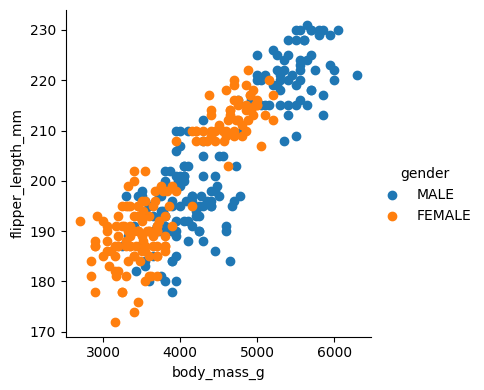

In [14]:
# plt.figure(figsize=(10,8))
g = sns.FacetGrid(df_peng, hue="gender", height = 4) \
   .map(plt.scatter, "body_mass_g", "flipper_length_mm") \
   .add_legend()

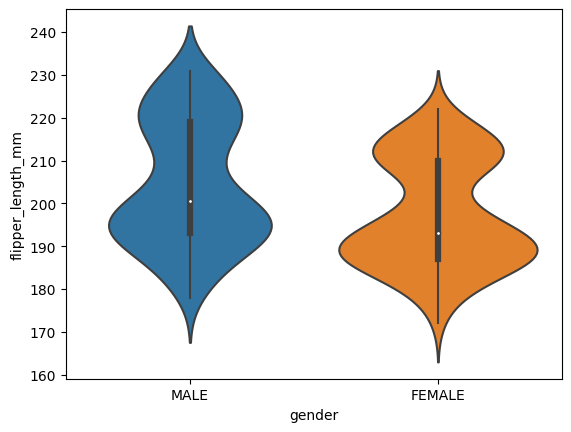

In [15]:
ax = sns.violinplot(x="gender", y="flipper_length_mm", data=df_peng,size=8)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [17]:
objList = X.select_dtypes(include = "object").columns
print(objList)

Index(['species', 'island'], dtype='object')


In [18]:
en = LabelEncoder()
for i in objList:
    X[i] = en.fit_transform(X[i].astype(str))
# encode all string values to float in X for modelling
print (X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int32  
 1   island             333 non-null    int32  
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
dtypes: float64(4), int32(2)
memory usage: 15.6 KB
None


In [19]:
#splitting the data into train and test data with 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [20]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy='most_frequent', random_state=2020)
dummy_classifier.fit(X_train,Y_train)

acc_baseline = dummy_classifier.score(X_test,Y_test)
print("Baseline Accuracy = ", acc_baseline)

Baseline Accuracy =  0.46


In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_clsf = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3 , min_samples_split = 3, random_state = 100)
dt_clsf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=3, random_state=100)

In [42]:
ypred = dt_clsf.predict(X_test)

In [43]:
print('Training-set accuracy score: {0:0.4f}'. format(dt_clsf.score(X_train,Y_train)))

Training-set accuracy score: 0.9142


In [44]:
from sklearn.tree import plot_tree #to plot the decision tree

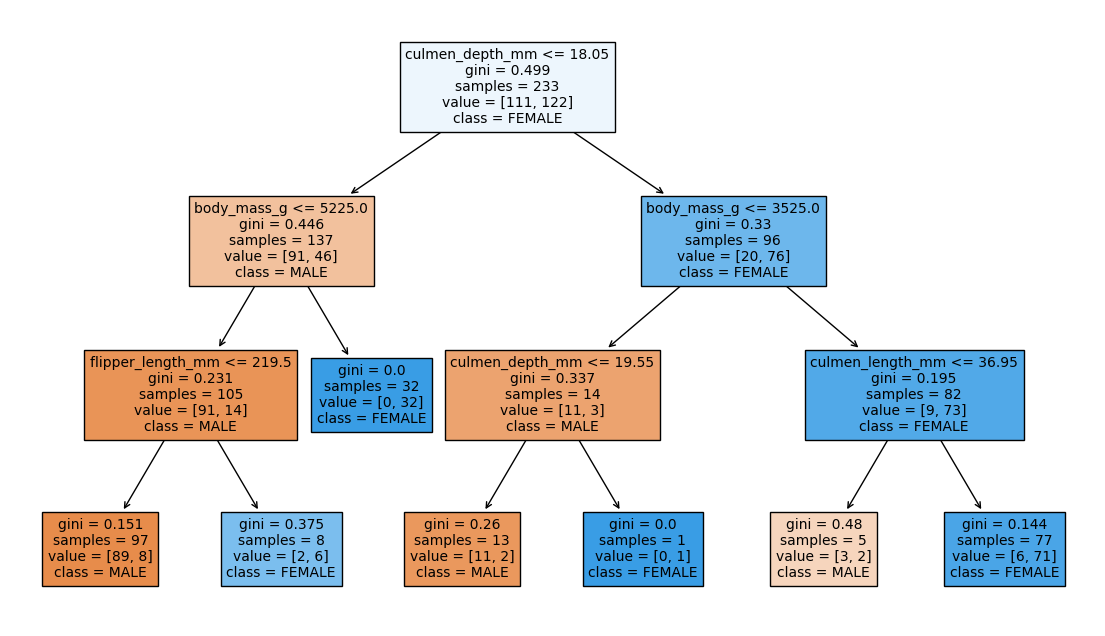

In [45]:
#Plot the tree
featr_list =list(X.columns)
cls_list = list(set(Y))
plt.figure(figsize=(14,8), dpi=100)
plot_tree(dt_clsf, feature_names = featr_list, class_names = cls_list, fontsize=10, filled =True)
plt.savefig('DecisionTree_Gini_Penguin.svg')

In [35]:
from sklearn.tree import export_text

# export the decision rules
tree_rules = export_text(dt_clsf,
                        feature_names=list(X.columns))
# print the result
print(tree_rules)

|--- culmen_depth_mm <= 18.05
|   |--- body_mass_g <= 5225.00
|   |   |--- flipper_length_mm <= 219.50
|   |   |   |--- class: FEMALE
|   |   |--- flipper_length_mm >  219.50
|   |   |   |--- class: MALE
|   |--- body_mass_g >  5225.00
|   |   |--- class: MALE
|--- culmen_depth_mm >  18.05
|   |--- body_mass_g <= 3525.00
|   |   |--- culmen_depth_mm <= 19.55
|   |   |   |--- class: FEMALE
|   |   |--- culmen_depth_mm >  19.55
|   |   |   |--- class: MALE
|   |--- body_mass_g >  3525.00
|   |   |--- culmen_length_mm <= 36.95
|   |   |   |--- class: FEMALE
|   |   |--- culmen_length_mm >  36.95
|   |   |   |--- class: MALE



In [26]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
scores = cross_val_score(dt_clsf, X, Y, cv=5)
print("Cross Validation Score: ",scores.mean())
y_pred_train = dt_clsf.predict(X_train)
print('Model Accuracy(train)', metrics.accuracy_score(Y_train, y_pred_train))

Cross Validation Score:  0.8171867933061963
Model Accuracy(train) 0.9141630901287554


In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report

#The confusion matrix for predictions vs test cases
cm = confusion_matrix(Y_test,ypred)
print("confusion matrix: \n", cm, end="\n\n")
print("classification report:\n",classification_report(Y_test,ypred))
print('Model Accuracy(test)', metrics.accuracy_score(Y_test, ypred))

confusion matrix: 
 [[52  2]
 [11 35]]

classification report:
               precision    recall  f1-score   support

      FEMALE       0.83      0.96      0.89        54
        MALE       0.95      0.76      0.84        46

    accuracy                           0.87       100
   macro avg       0.89      0.86      0.87       100
weighted avg       0.88      0.87      0.87       100

Model Accuracy(test) 0.87


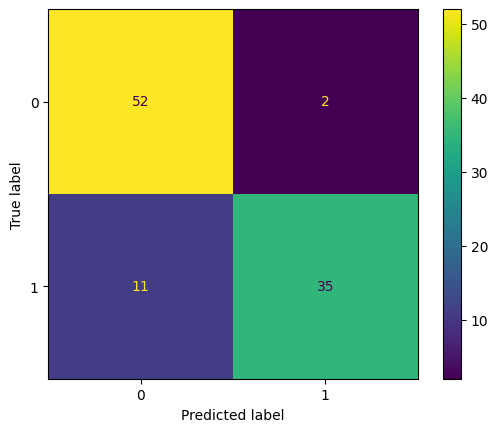

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.savefig('ConfusionMatrixPenguingData_Gini.svg')

In [29]:
#compare predicted values with the actual scores
compare_df = pd.DataFrame({'actual': Y_test, 'predicted': ypred})
compare_df = compare_df.reset_index(drop = True)
print(compare_df)

    actual predicted
0   FEMALE    FEMALE
1     MALE      MALE
2   FEMALE    FEMALE
3   FEMALE    FEMALE
4   FEMALE    FEMALE
..     ...       ...
95  FEMALE    FEMALE
96  FEMALE    FEMALE
97  FEMALE    FEMALE
98  FEMALE    FEMALE
99  FEMALE    FEMALE

[100 rows x 2 columns]


<AxesSubplot:xlabel='actual', ylabel='count'>

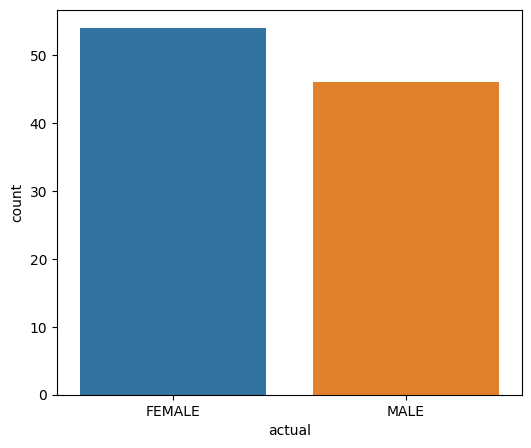

In [30]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
sns.countplot(x=compare_df["actual"], ax=ax)

In [31]:
#feature imp
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(dt_clsf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
5,body_mass_g,0.585
3,culmen_depth_mm,0.303
4,flipper_length_mm,0.081
2,culmen_length_mm,0.031
0,species,0.000
1,island,0.000


In [32]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    accuracy.append(score)

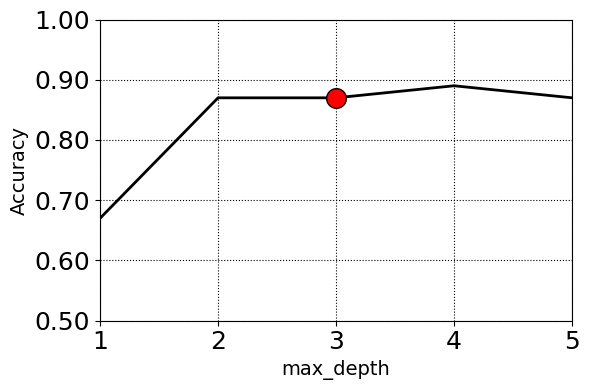

In [33]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,4));

marker_style = dict(color='tab:blue', linestyle=':', marker='o',
                    markersize=15, markerfacecoloralt='tab:red')

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k',
        zorder = 0)

s = ax.scatter(max_depth_range[2],
           accuracy[2],
           color = 'r',
           s = 200,
           alpha = 1,
           zorder = 10,
           marker = 'o',)

s.set_edgecolor( 'black' )


ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 1,
        linestyle = ':',
        color = 'k')

yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 14)
ax.set_ylabel('Accuracy', fontsize = 14)
fig.tight_layout()
fig.savefig('max_depth_vs_accuracy.png', dpi = 300)

In [34]:
from sklearn.model_selection import GridSearchCV

param_dist = {"max_depth": range(1,6),
              "max_features": range(1,10),
              "criterion": ["gini", "entropy"]}
dt_cv = GridSearchCV(dt_clsf, param_dist, cv=5)
dt_cv.fit(X_train,Y_train)
print(dt_cv.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 6}
